### Moving Window Analysis - (Non-overlapping case)
**BACKGROUND**
- Take the data representing the preictal state
- Create a function to work on the channels
    - Averaging
    - Maximum values in the window followed by averaging
- Slide the window accumulating the return value of the function
- Plot to see anamoly/ change which can predict the occurence of the seizure

In [3]:
# imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Plot  of Maximum in Channels

In [4]:
def max_channel_plot(names):
    '''
    Plotting the normalized values of the channels
    '''
    for f in os.listdir(src_path):
        plt.figure()
        curr_df = pd.read_csv(src_path+f, index_col=0)
        curr_df.max(axis=0).plot(subplots=True, marker='*', linestyle='-', markersize = 12, figsize=(10,10), title=f)
        _ = plt.xticks(ticks=range(13), labels=names)
    return 'Plotting Maximum of channels!'

'Plotting Maximum of channels!'

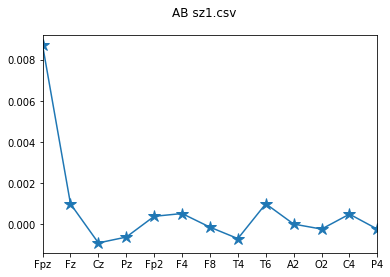

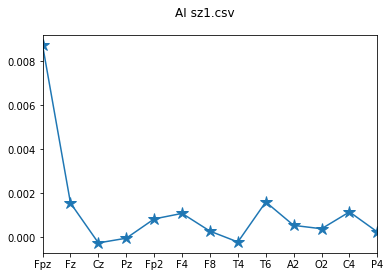

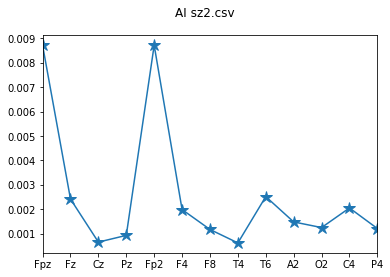

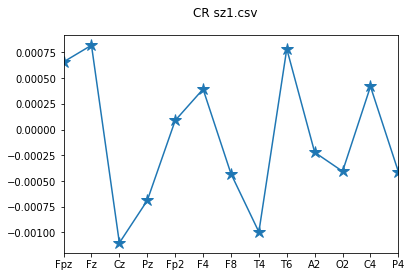

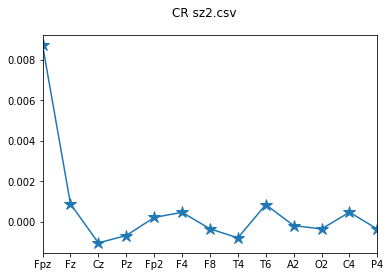

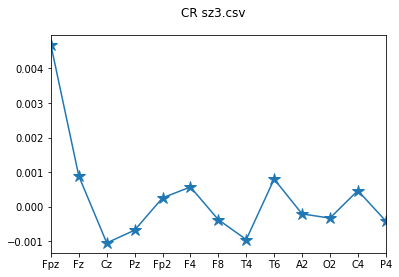

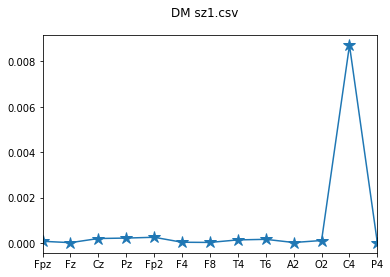

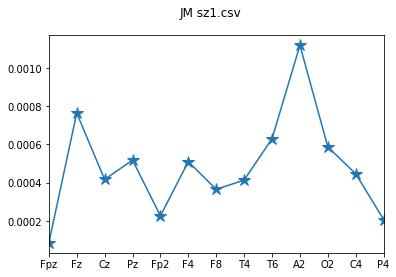

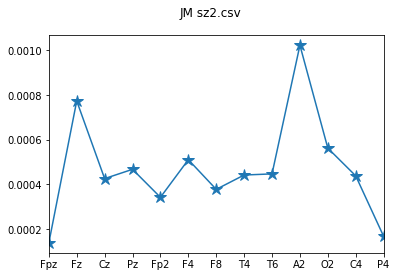

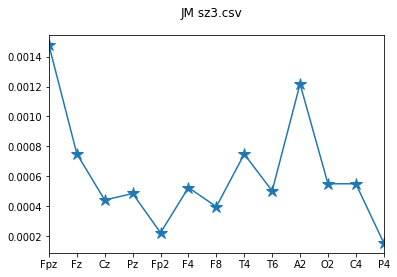

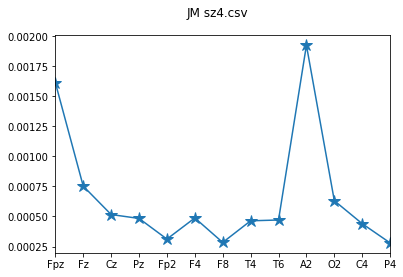

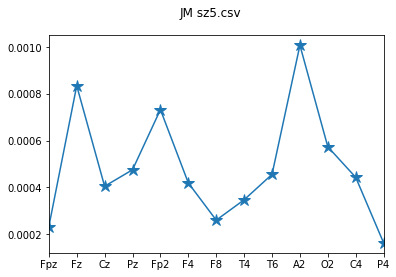

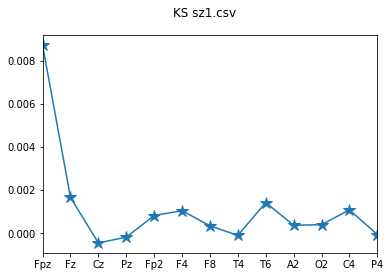

In [5]:
# Get the data
src_path = os.getcwd() + '//csv_preictal_window//'
names = ['Fpz', 'Fz', 'Cz', 'Pz', 'Fp2', 'F4', 'F8', 'T4', 'T6', 'A2', 'O2', 'C4', 'P4']
max_channel_plot(names)

### Compute Averages of Channels
- 10 second window + 0 second overlap (10 second moving average) -  BASE CASE
- 5 second window + 0 second overlap (5 second moving average) - Second try

This will give the trend in the waves rather than the noise in the signal. The process of detrending is part of calculating the way in which the signal moves in a general manner as time progresses.

In [6]:
def plot_windows(win, freq):
    rolling_df = pd.DataFrame() 
    start_times = [76, 69, 180.1, 2, 53, 118, 147.7, 63, 27, 27, 32, 22, 59]
    for ind, f in enumerate(os.listdir(src_path)):
        curr_df = pd.read_csv(src_path+f, index_col=0)
        plt.figure()
        for col in names:
            if ind in [1,2,5]:
                rolling_df['Moving_average_P'+str(ind)] = curr_df[col].rolling(win[0]*freq[0]).mean()
            elif ind in [3, 4]:
                rolling_df['Moving_average_P'+str(ind)] = curr_df[col].rolling(int(win[1]*freq[0])).mean()
                if ind == 4: plt.xlim(0,400)
                else: plt.xlim(0,14000)
            else:
                rolling_df['Moving_average_P'+str(ind)] = curr_df[col].rolling(win[0]*freq[1]).mean()
        _ = rolling_df.iloc[:,ind].dropna().plot(linewidth=1.5, title=str(ind+1)+'). '+f, figsize=(20,5))
        _ = plt.legend(bbox_to_anchor=(1, 1.01))
    return 'Plotting Windows'

In [7]:
win1  = [1, 0.1] # 1 and 0.1 second windows
win2 = [0.5, 0.1] #  0.5 and 0.1 second windows 
freq = [200, 256] # Sampling frequency of 200 Hz and 200 KHz

In [ ]:
plot_windows(win1, freq) # 1 and 0.1 seconds window

In [ ]:
plot_windows(win2, freq) # 0.5 and 0.1 seconds window

### Observation
- Sinusoidal nature visible in signal
- Can I test the uniformity of the signal average in the said windows?
- Is the way of analyzing the windows using the avearage of the 13 selected channels the best way?

5 second windows will have $200*1 = 200$ samples in them. To get the effective solution out of the data we can get the window to have a 